<a href="https://colab.research.google.com/github/lschabler/TensorFlowTutorials/blob/main/TF_ML_Tutorial5_ConvolutionalNeuralNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Deep Computer Vision **

**Convolutional Neural Network**

Each convolutional neural network is made up of one or many convolutional layers. These layers are different than the *dense* layers we have seen previously. Their goal is to find patterns from within images that can be used to classify the image or parts of it. But this may sound familiar to what our densly connected neural network in the previous section was doing, well that's becasue it is. 

The fundemental difference between a dense layer and a convolutional layer is that dense layers detect patterns globally while convolutional layers detect patterns locally. When we have a densly connected layer each node in that layer sees all the data from the previous layer. This means that this layer is looking at all the information and is only capable of analyzing the data in a global capacity. Our convolutional layer however will not be densly connected, this means it can detect local patterns using part of the input data to that layer.

**Dense Layer:** A dense layer will consider the ENTIRE image. It will look at all the pixels and use that information to generate some output.

**Convolutional Layer:** The convolutional layer will look at specific parts of the image. In this example let's say it analyzes the highlighted parts below and detects patterns there.





In [1]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

#  LOAD AND SPLIT DATASET
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Layer 1 32 filters of size 3x3 over our input data
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

# Layer 2 max pooling operation using 2x2 samples and a stride of 2.
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Layer increase the frequency of filters from 32 to 64. decrease depth
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.summary()

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # this line is not required unless you are in a notebook`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-

In [2]:
# Add dense Layer (classify features)

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [3]:
# training 

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=8, 
                    validation_data=(test_images, test_labels))

# evaluate

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

Epoch 1/8
1563/1563 [==============================] - 76s 48ms/step - loss: 1.7993 - accuracy: 0.3341 - val_loss: 1.3642 - val_accuracy: 0.5011
Epoch 2/8
1563/1563 [==============================] - 76s 49ms/step - loss: 1.2817 - accuracy: 0.5377 - val_loss: 1.1399 - val_accuracy: 0.5992
Epoch 3/8
1563/1563 [==============================] - 82s 52ms/step - loss: 1.0857 - accuracy: 0.6162 - val_loss: 1.0812 - val_accuracy: 0.6200
Epoch 4/8
1563/1563 [==============================] - 78s 50ms/step - loss: 0.9712 - accuracy: 0.6567 - val_loss: 0.9556 - val_accuracy: 0.6636
Epoch 5/8
1563/1563 [==============================] - 76s 49ms/step - loss: 0.8911 - accuracy: 0.6874 - val_loss: 0.9399 - val_accuracy: 0.6732
Epoch 6/8
1563/1563 [==============================] - 75s 48ms/step - loss: 0.8307 - accuracy: 0.7044 - val_loss: 0.8823 - val_accuracy: 0.6910
Epoch 7/8
1563/1563 [==============================] - 78s 50ms/step - loss: 0.7755 - accuracy: 0.7286 - val_loss: 0.8708 - val_ac

Test image 0 prediction: 
[-0.7064429 -2.5865211  0.0410478  0.4793098  2.0900233 -3.6003375
 -1.7869967 -2.6117306  1.2697396 -2.5768018]
class_names['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
predicted: deer


2.0900233 deer
1.2697396 ship
0.4793098 cat
0.0410478 bird
-0.7064429 airplane
-1.7869967 frog
-2.5768018 truck
-2.5865211 automobile
-2.6117306 horse
-3.6003375 dog


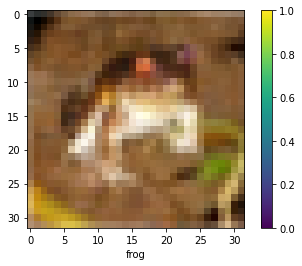

In [21]:
predictions = model.predict(test_images)

index = 0

print("Test image " + str(index) + " prediction: \n" + str(predictions[index]))

print("class_names" + str(class_names))

predindex = np.argmax(predictions[index])

print("predicted: " + class_names[predindex])
print("\n")


sortedindex = np.argsort(predictions[index])

for val in np.flip(sortedindex):
    print(str(predictions[index][val]) + " " + class_names[val])

plt.figure()
plt.imshow(train_images[index])
plt.colorbar()
plt.grid(False)
plt.xlabel(class_names[train_labels[index][0]])
plt.show()